In [ ]:
!pip install prophet

In [ ]:
import logging
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Time period: 24 months
time_period = pd.date_range(start="2023-01-01", periods=24, freq="M")

# Initialize DataFrame
data = pd.DataFrame({'Date': time_period})

In [ ]:
# Function to add trend
def add_trend(length, slope=0):
    return slope * np.arange(length, dtype=float)

# Function to add seasonality
def add_seasonality(length, amplitude=1, period=12):
    return amplitude * np.sin(2 * np.pi * np.arange(length, dtype=float) / period)


# Function to add intermittent demand
def add_intermittent_demand(data, sparsity=0.5):
    return data * (np.random.rand(len(data)) < sparsity)

# Function to add random variation
def add_variation(data, scale=1):
    return data + np.random.normal(0, scale, len(data))


In [ ]:
# Generating data for each SKU
for sku in range(1, 21):
    trend_slope = random.choice([0, 0.5, -0.5])
    seasonality_amplitude = random.choice([0, 5, 10])
    intermittent_sparsity = random.choice([1, 0.7, 0.3])
    variation_scale = random.choice([1, 5, 10])

    length = len(data)
    sku_data = add_trend(length, trend_slope)
    sku_data += add_seasonality(length, seasonality_amplitude)
    sku_data = add_intermittent_demand(sku_data, intermittent_sparsity)
    sku_data = add_variation(sku_data, variation_scale)

    data[f'SKU_{sku}'] = sku_data.clip(min=0)  # Ensuring no negative values

# Transforming the data into long format
data_long = pd.melt(data, id_vars=['Date'], var_name='SKU', value_name='Sales')

data_long.head()

,Date,SKU,Sales
0,2023-01-31,SKU_1,0.876047
1,2023-02-28,SKU_1,1.472671
2,2023-03-31,SKU_1,4.726146
3,2023-04-30,SKU_1,6.270451
4,2023-05-31,SKU_1,0.000000


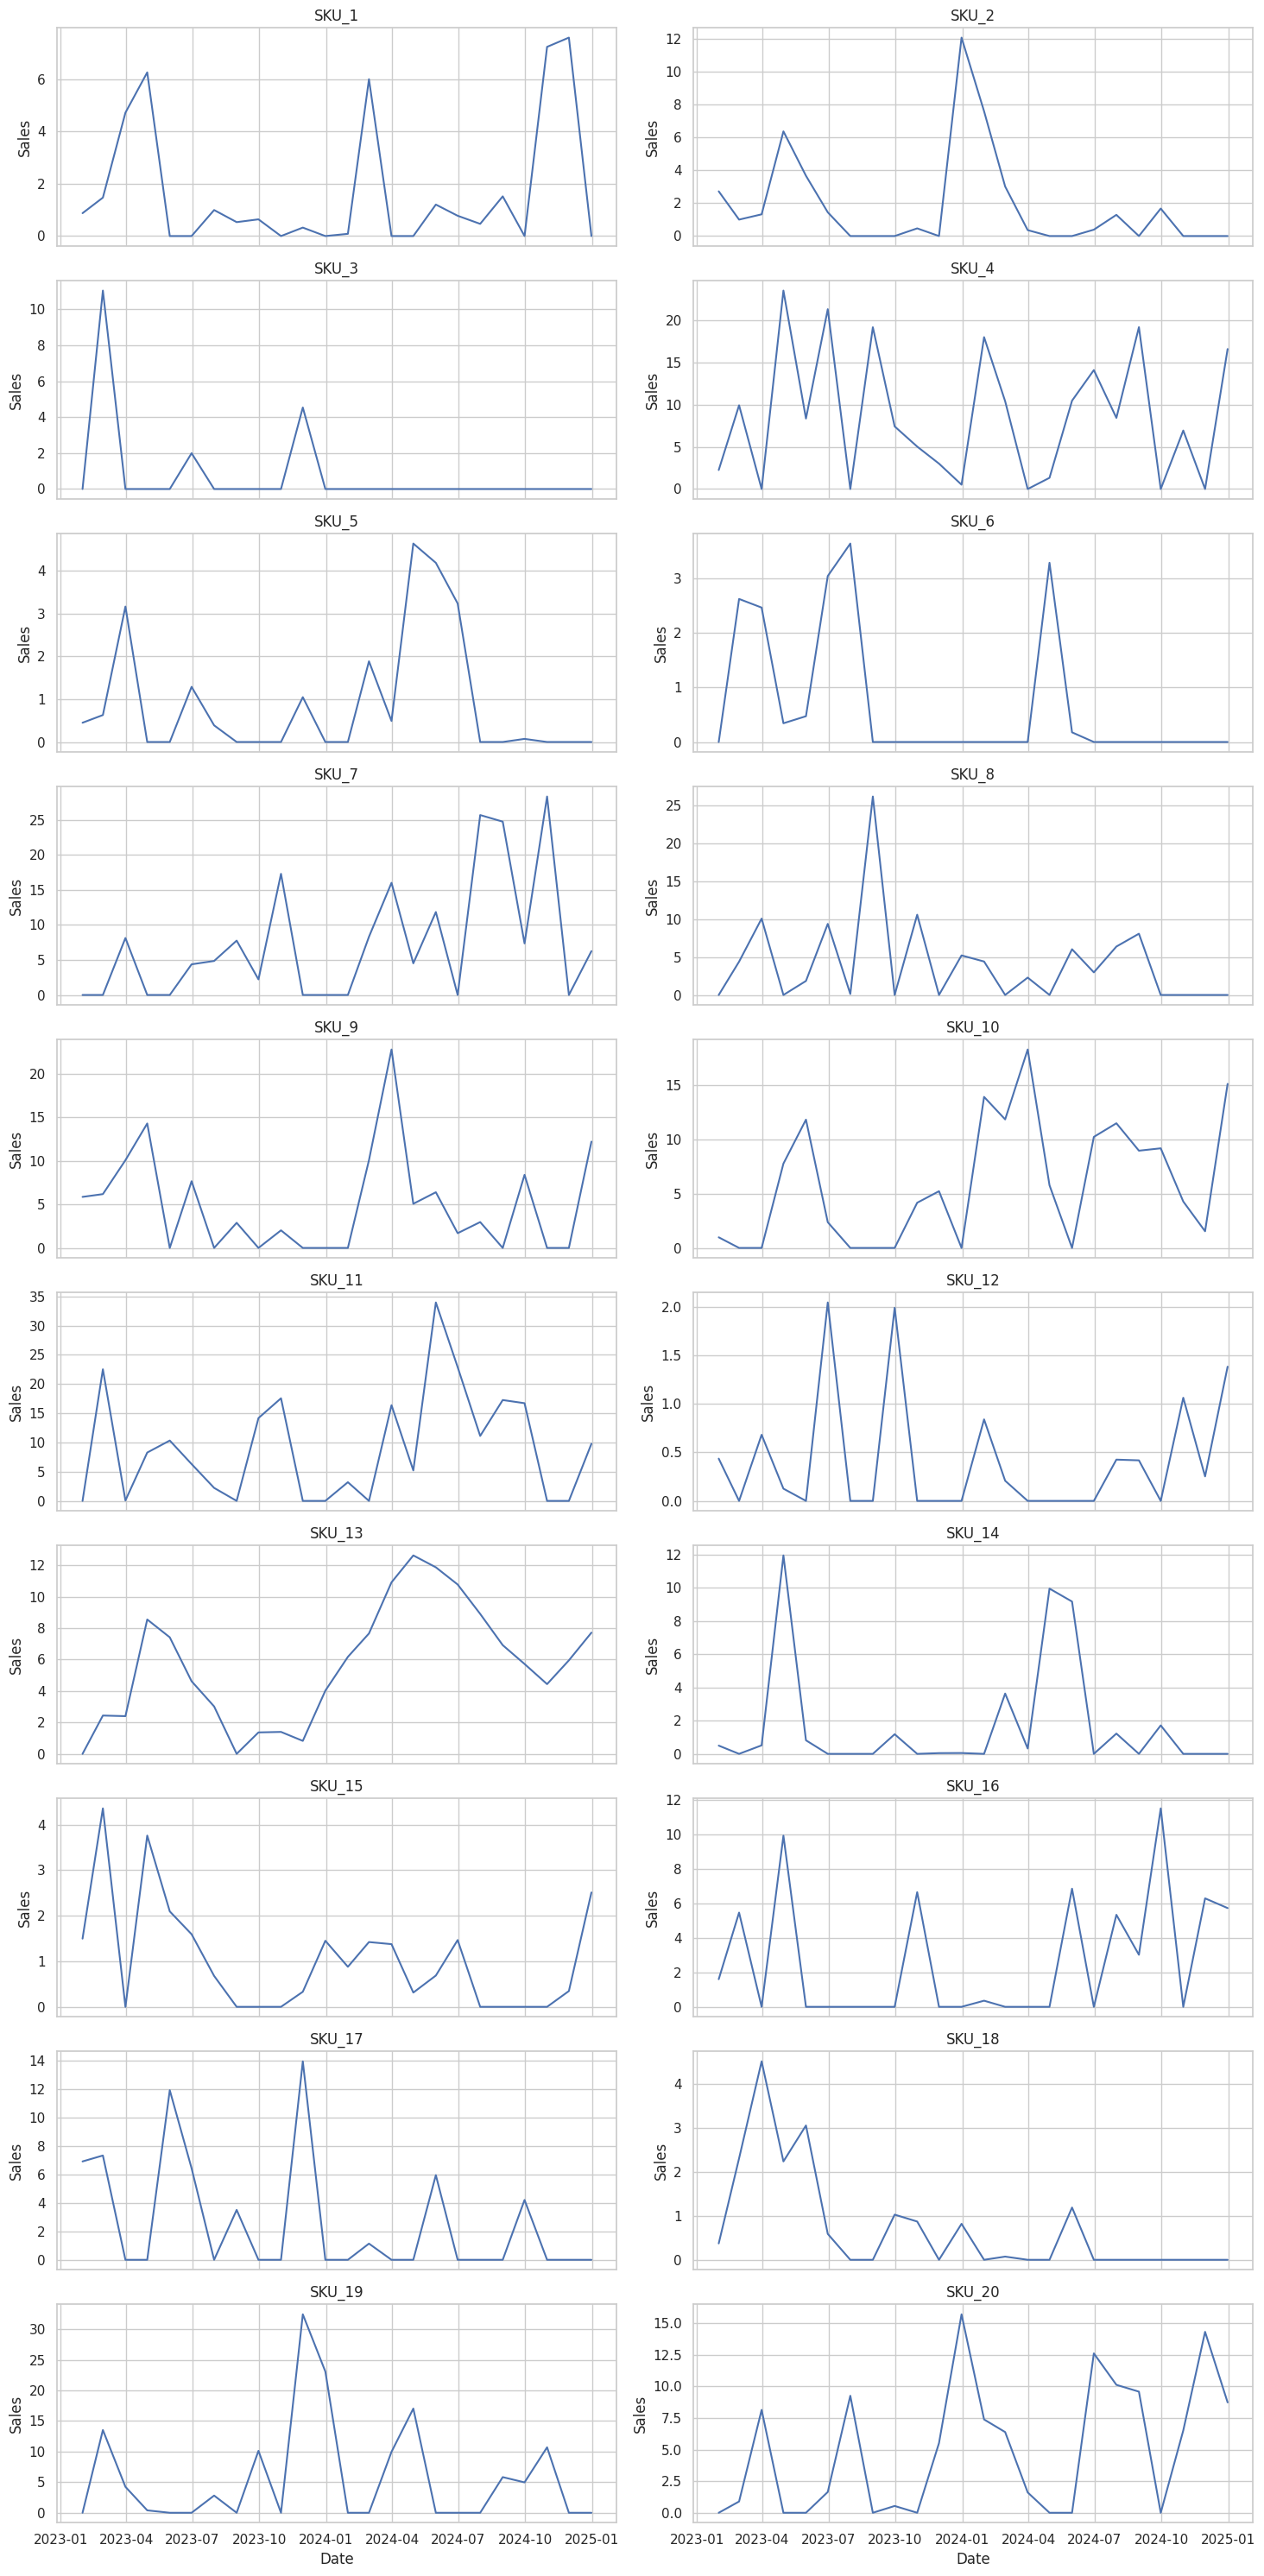

In [ ]:
# Plotting each SKU's time-series data separately

# Creating a grid of plots
fig, axes = plt.subplots(10, 2, figsize=(15, 30), sharex=True)

# Flattening the array of axes for easy iteration
axes = axes.flatten()

# Plotting each SKU on a separate subplot
for i, sku in enumerate(data.columns[1:]):
    sns.lineplot(ax=axes[i], data=data, x='Date', y=sku)
    axes[i].set_title(sku)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales')

# Enhancing the layout
plt.tight_layout()
plt.show()


In [ ]:
def forecasting_with_prophet(model, prophet_data):
      from sklearn.metrics import mean_squared_error, mean_absolute_error

      # Split data into train and test for backtesting
      backtest_steps = 3  # e.g., 12 months for backtesting
      forecast_steps = 1  # e.g., 12 months
      train_data = prophet_data[:-backtest_steps]
      test_data = prophet_data[-backtest_steps:]

      # Fit the Prophet model
      model.fit(prophet_data)

      # Make future forecasts
      future_dates = model.make_future_dataframe(periods=backtest_steps + forecast_steps, freq='M')
      forecast = model.predict(future_dates)

      # Extract predicted values for the backtesting period
      predicted_values = forecast['yhat'][-(backtest_steps + backtest_steps + forecast_steps):-(backtest_steps + forecast_steps)]

      # Calculate RMSE
      rmse = np.sqrt(mean_squared_error(test_data['y'], predicted_values))

      # Store the model and forecasts
      sku_models[sku] = model
      sku_forecasts[sku] = forecast
      sku_rmse[sku] = rmse

      print(f'RMSE: {rmse}')

      # Creating a plot
      fig = model.plot(forecast)
      plt.axvline(x=actual['Date'].iloc[-backtest_steps], color='green', linestyle='--', label='Forecast Start')

      # Adding labels and legend
      plt.title(f"Forecast vs Actual for {sku}")
      plt.xlabel('Date')
      plt.ylabel('Sales')
      plt.legend()
      plt.show()

      #Plotting components
      fig2 = model.plot_components(forecast)
      plt.show()

**Vanilla Models**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/fd_jdbbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/obcwjret.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20511', 'data', 'file=/tmp/tmpk62hu53j/fd_jdbbb.json', 'init=/tmp/tmpk62hu53j/obcwjret.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelv_0ycopa/prophet_model-20240323084743.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 4.519157316970755


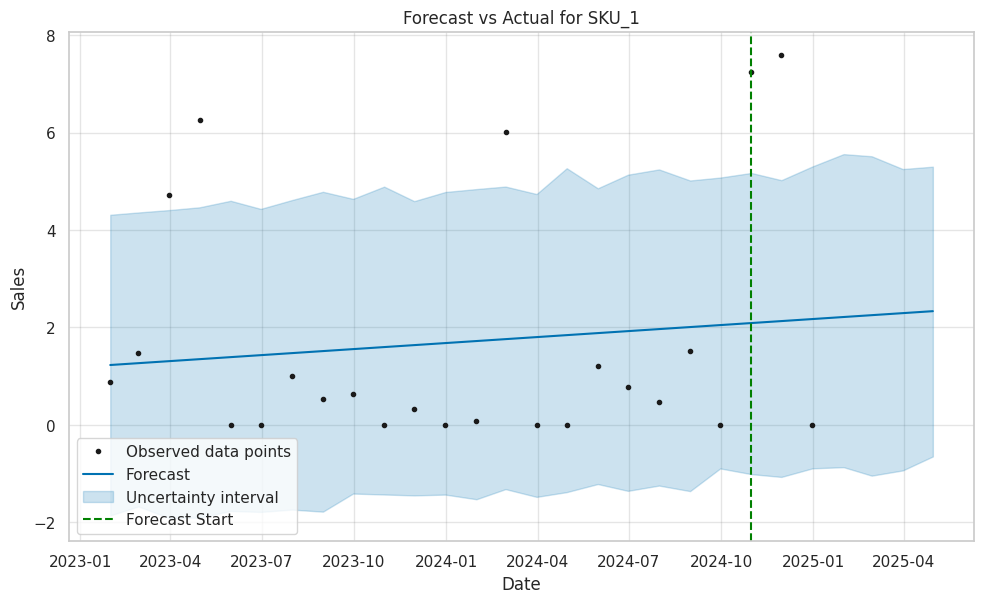

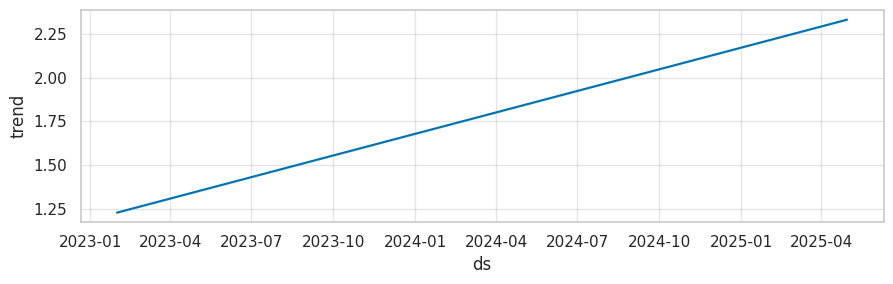

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/k2xrrof8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/hwp3yh0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63116', 'data', 'file=/tmp/tmpk62hu53j/k2xrrof8.json', 'init=/tmp/tmpk62hu53j/hwp3yh0j.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelspenvgqy/prophet_model-20240323084744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.7809693603771967


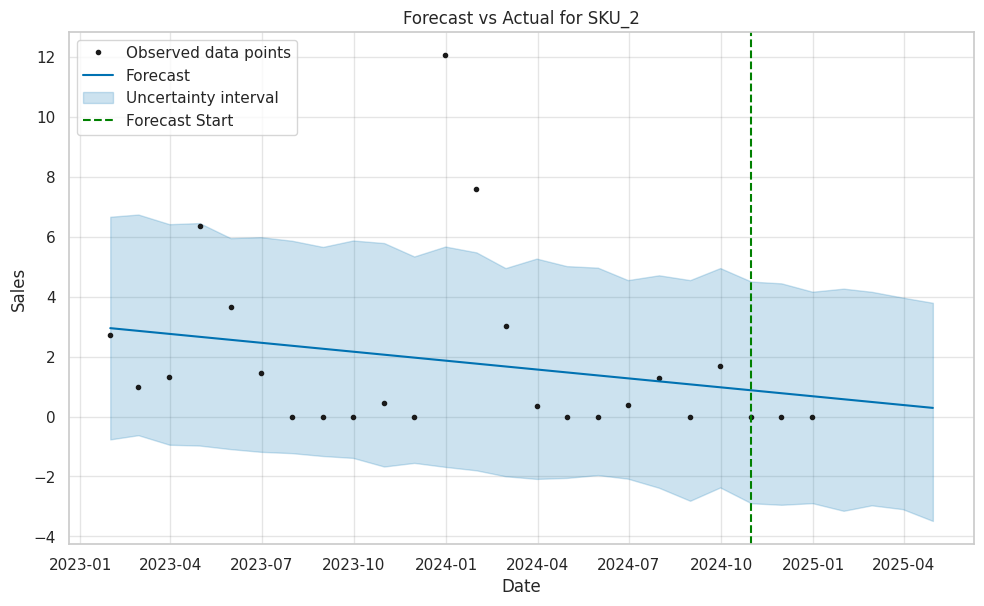

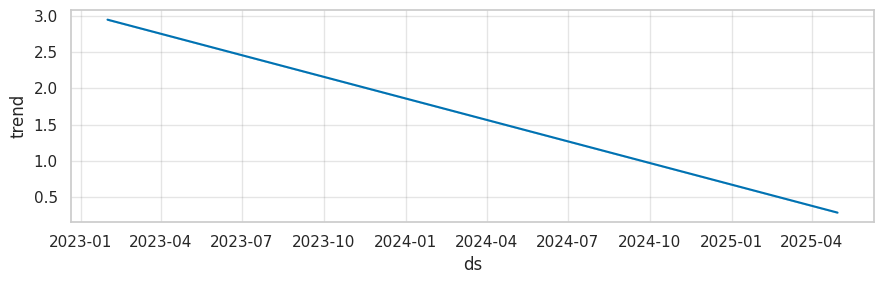

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/eh8m379s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/lrmvxhxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69933', 'data', 'file=/tmp/tmpk62hu53j/eh8m379s.json', 'init=/tmp/tmpk62hu53j/lrmvxhxl.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_model9lqz98ye/prophet_model-20240323084745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.5169729079381795


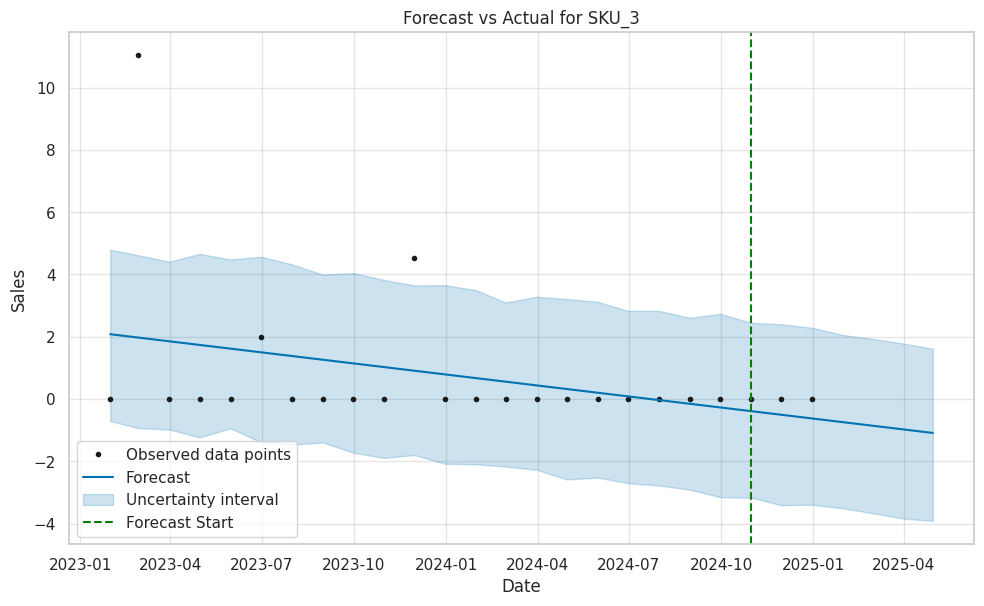

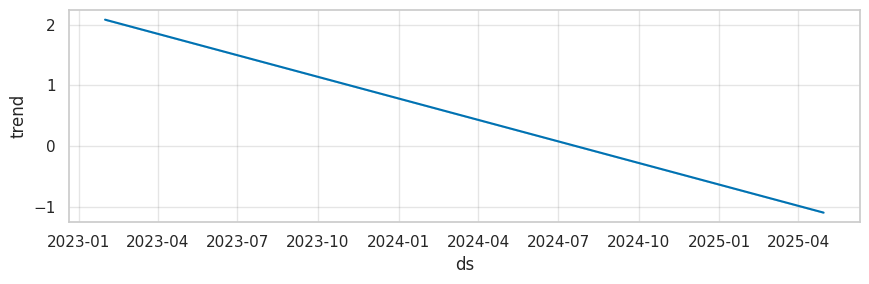

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/s7uhfer2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/so1rl20_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89088', 'data', 'file=/tmp/tmpk62hu53j/s7uhfer2.json', 'init=/tmp/tmpk62hu53j/so1rl20_.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelnwx35sxz/prophet_model-20240323084746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 6.832968875201059


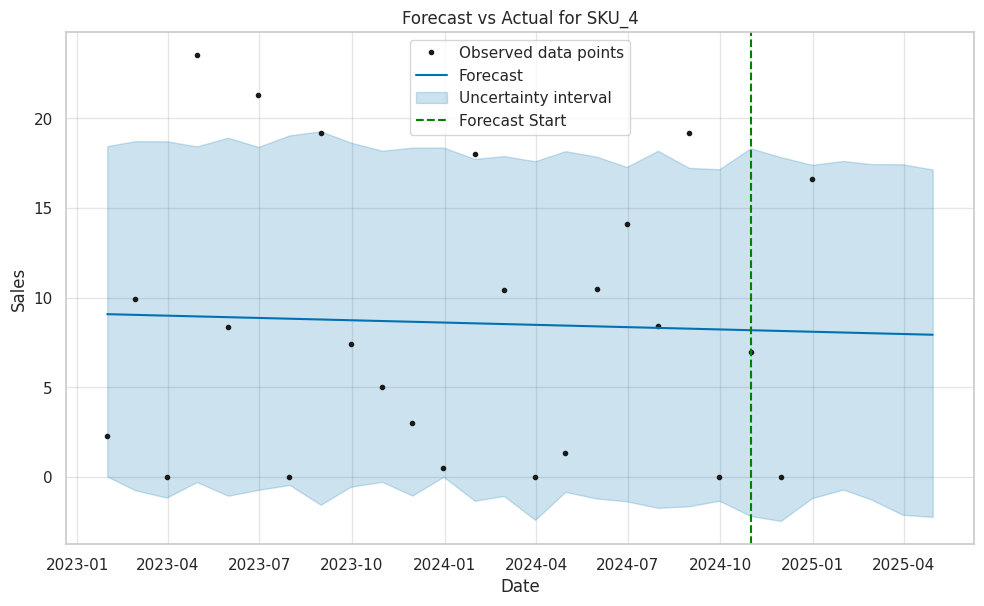

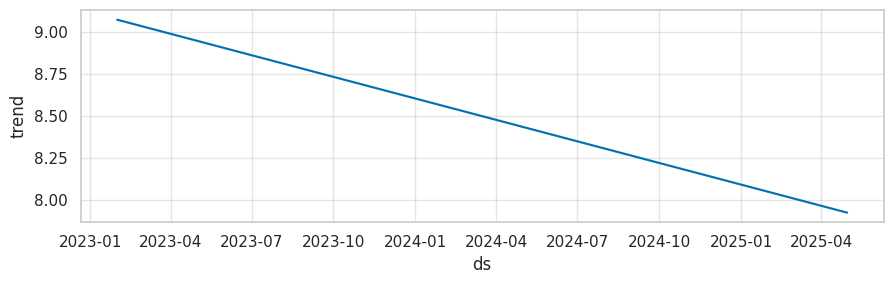

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/nlfxljxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/qb0mrds7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38639', 'data', 'file=/tmp/tmpk62hu53j/nlfxljxk.json', 'init=/tmp/tmpk62hu53j/qb0mrds7.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelxgj6g5un/prophet_model-20240323084747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.9235744435671637


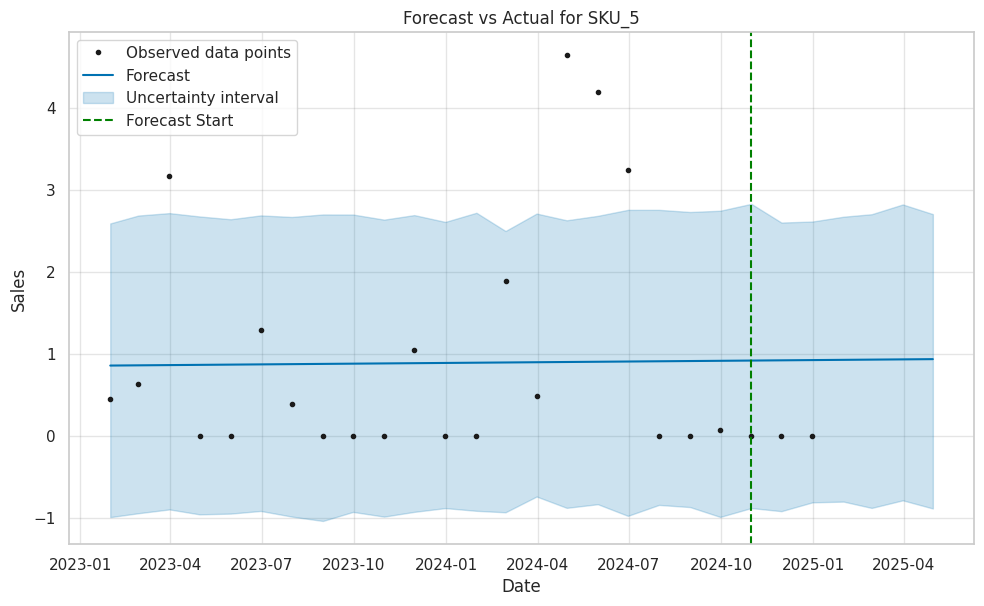

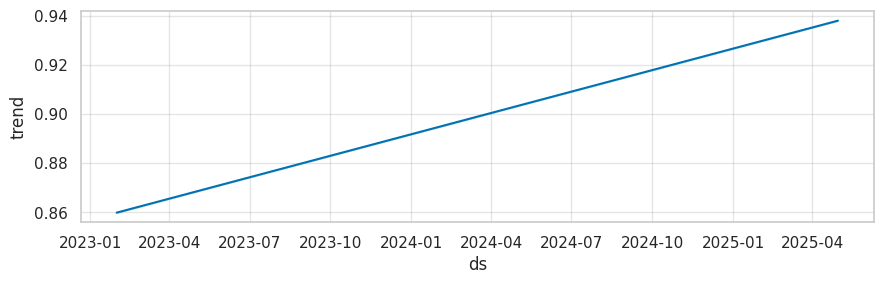

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/flil7at4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/ri98e8yu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65612', 'data', 'file=/tmp/tmpk62hu53j/flil7at4.json', 'init=/tmp/tmpk62hu53j/ri98e8yu.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelrd9hqycq/prophet_model-20240323084748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.12352967366989624


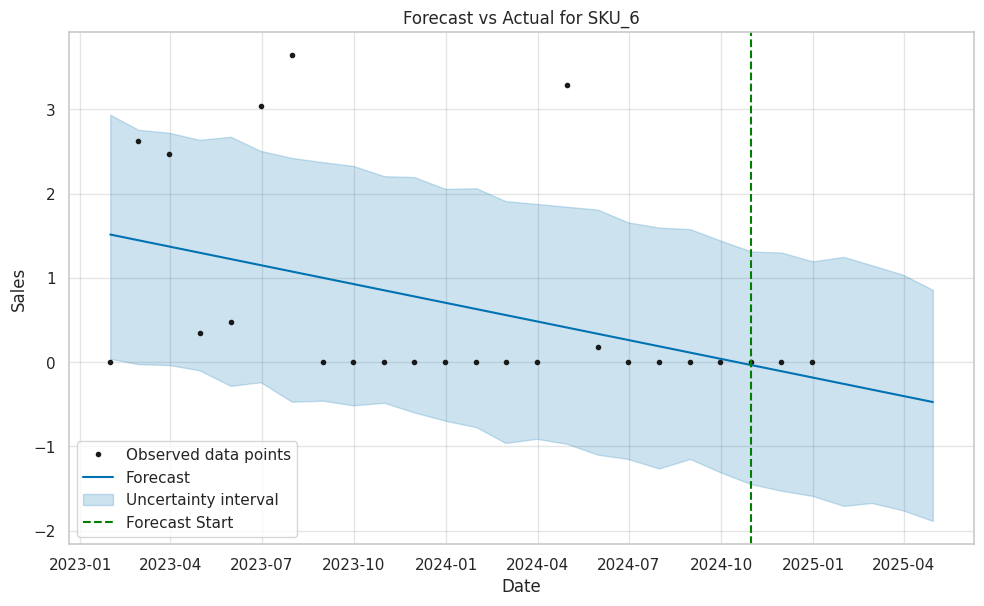

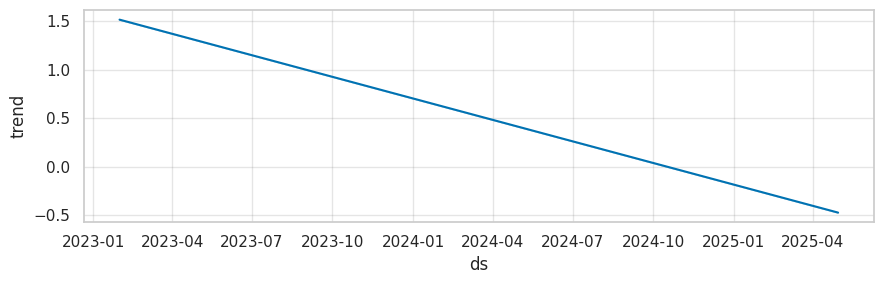

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/gplz82ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/07a3uj2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75068', 'data', 'file=/tmp/tmpk62hu53j/gplz82ze.json', 'init=/tmp/tmpk62hu53j/07a3uj2d.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelhcn_4gvc/prophet_model-20240323084749.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 12.63728439019826


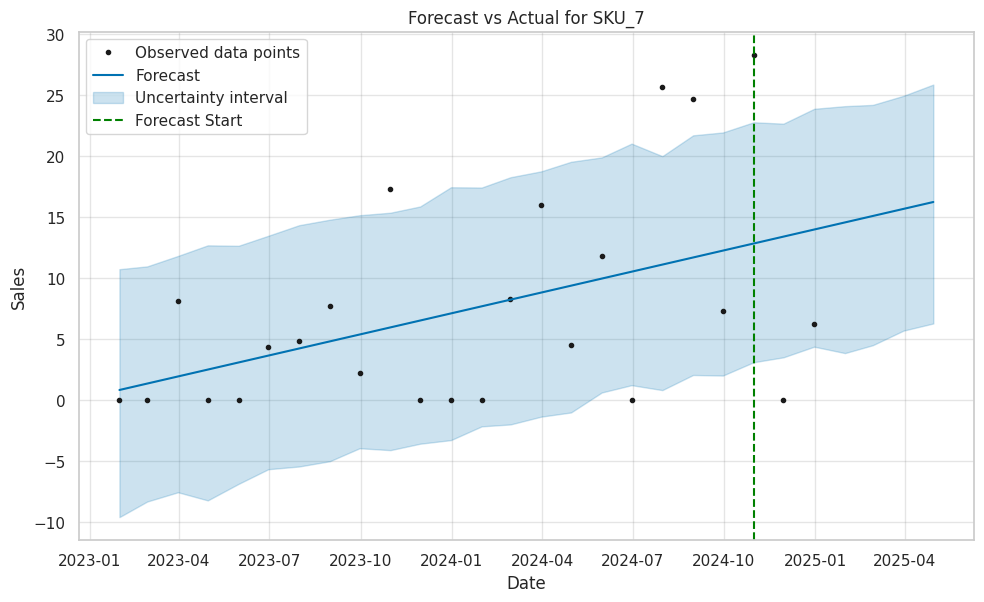

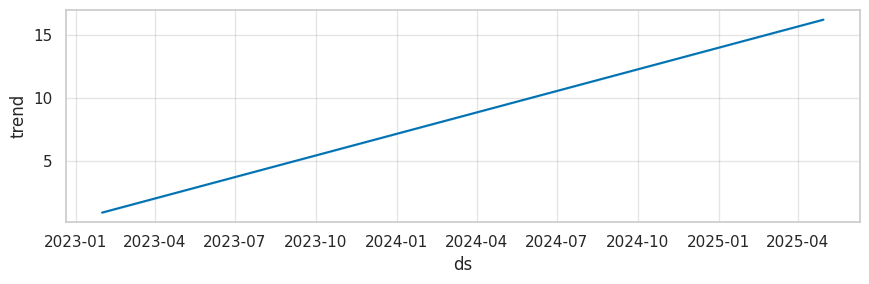

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/slgguvd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/9gmwg5bk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69487', 'data', 'file=/tmp/tmpk62hu53j/slgguvd7.json', 'init=/tmp/tmpk62hu53j/9gmwg5bk.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modeljt3o_3yd/prophet_model-20240323084750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2.177254304764581


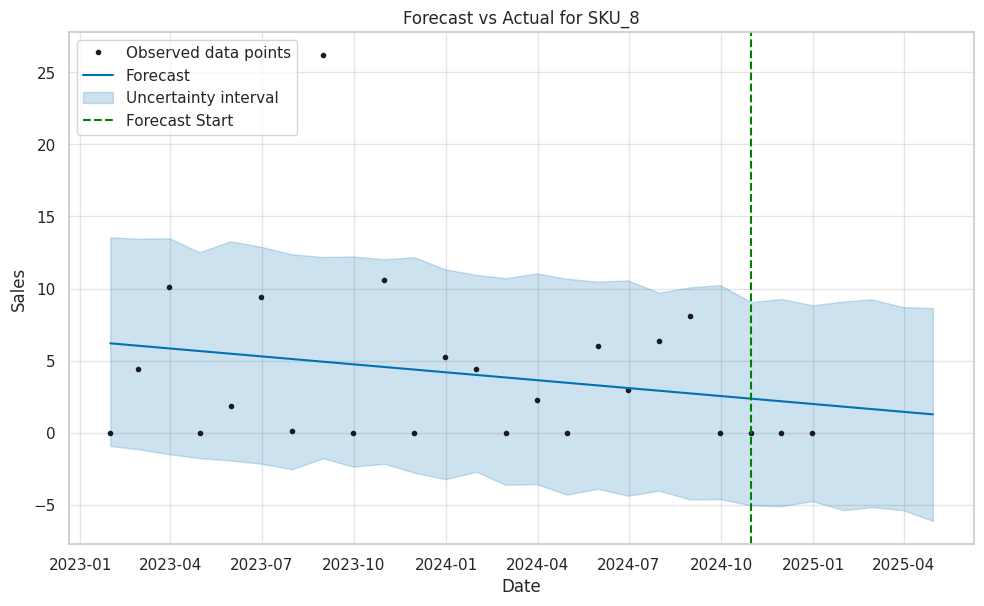

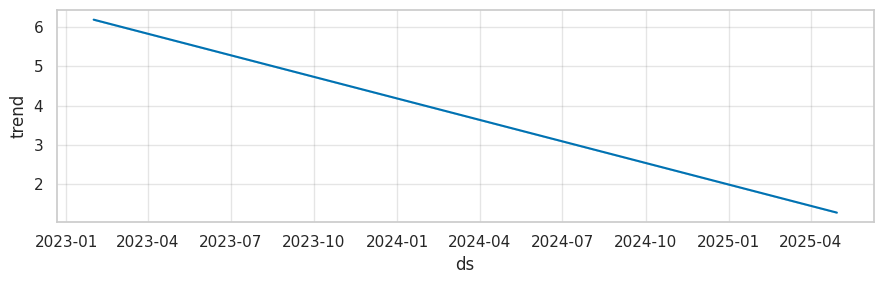

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/7aalhxrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/l7ztq_e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41442', 'data', 'file=/tmp/tmpk62hu53j/7aalhxrc.json', 'init=/tmp/tmpk62hu53j/l7ztq_e9.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelbybqw18d/prophet_model-20240323084751.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 5.7902275537086005


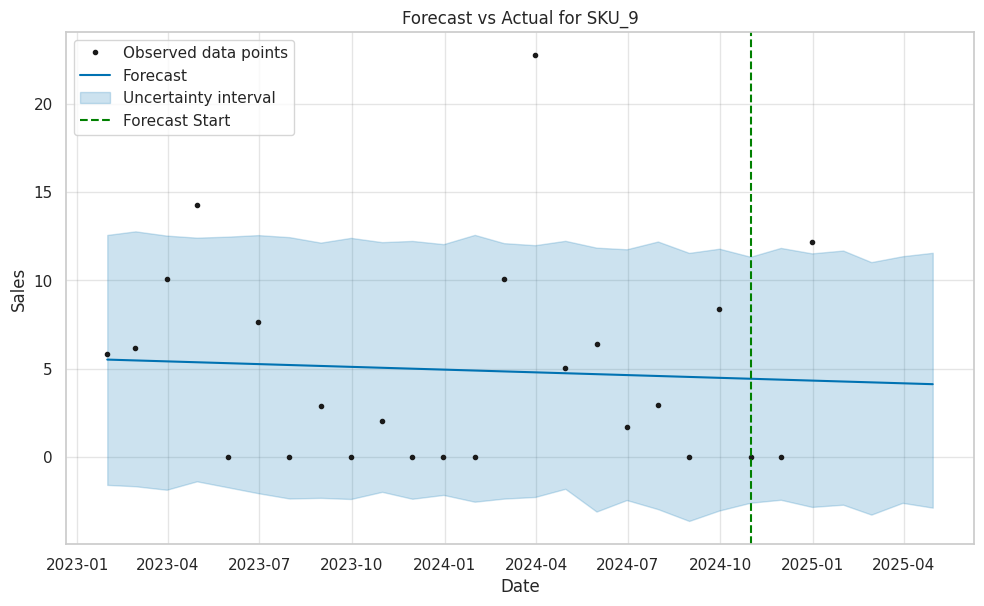

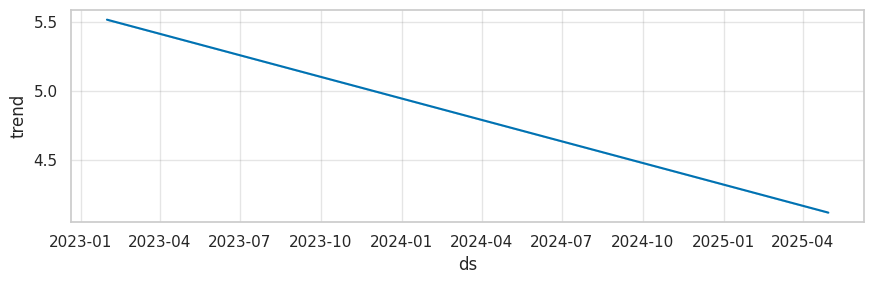

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/aruapdha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/au9djis5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82919', 'data', 'file=/tmp/tmpk62hu53j/aruapdha.json', 'init=/tmp/tmpk62hu53j/au9djis5.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelsmudinri/prophet_model-20240323084752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 6.240517586748782


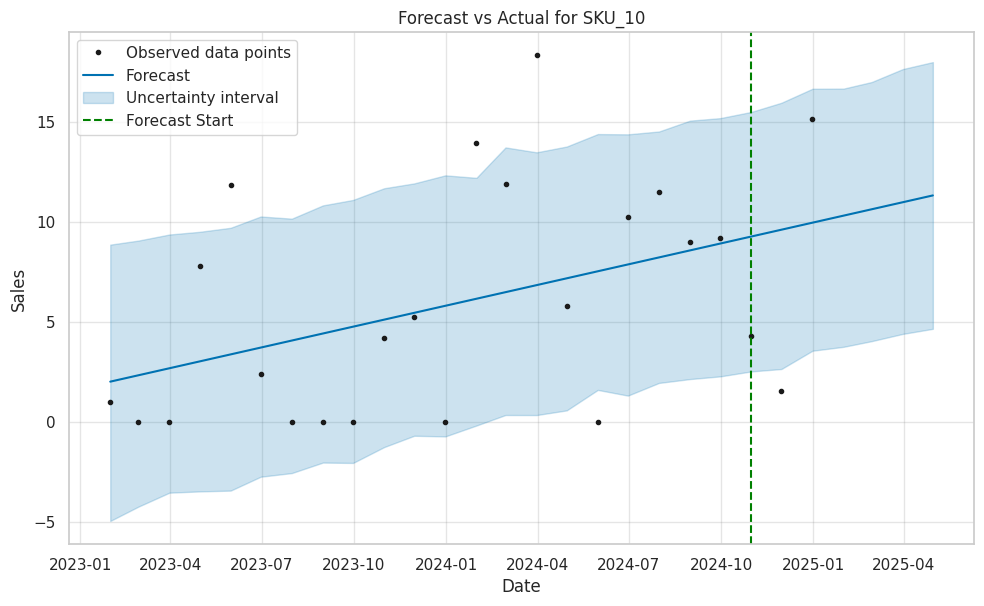

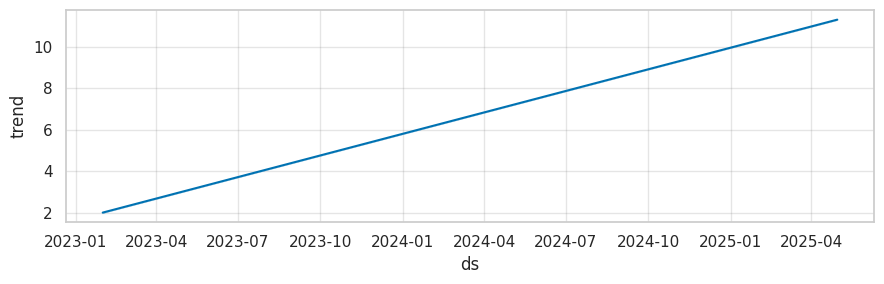

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/enyy_qz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/gdj4ptws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61223', 'data', 'file=/tmp/tmpk62hu53j/enyy_qz6.json', 'init=/tmp/tmpk62hu53j/gdj4ptws.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelnlfk04fo/prophet_model-20240323084753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 9.356561989889371


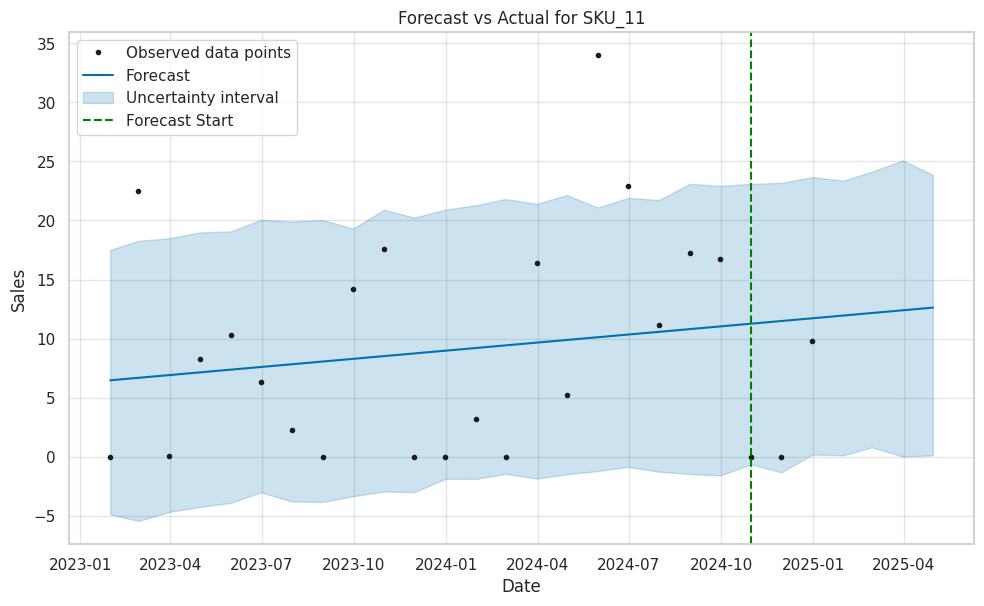

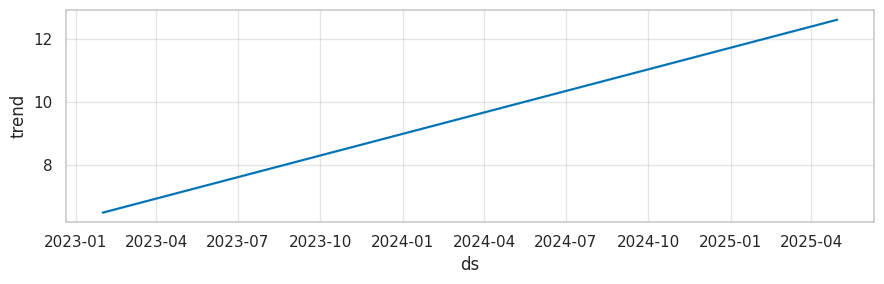

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/yzpbyoiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/mb_ok_y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21051', 'data', 'file=/tmp/tmpk62hu53j/yzpbyoiv.json', 'init=/tmp/tmpk62hu53j/mb_ok_y8.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelk10lgkuy/prophet_model-20240323084755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.6628476741237819


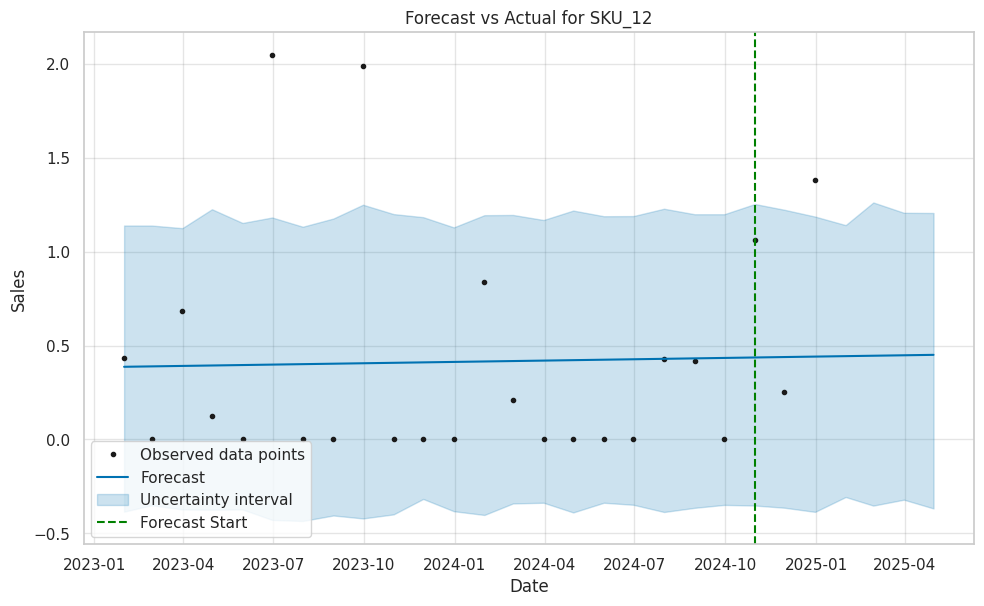

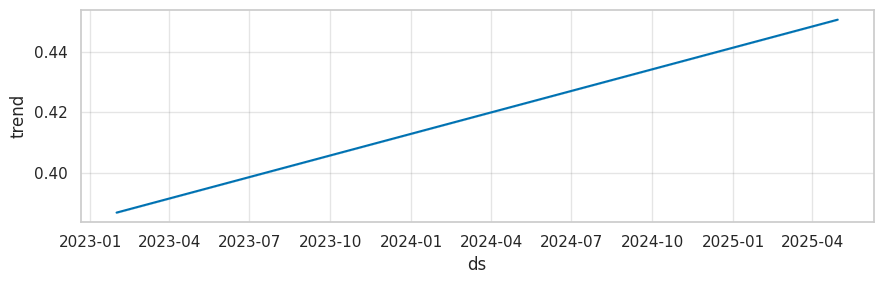

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/otj58a_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/wd1263cs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50932', 'data', 'file=/tmp/tmpk62hu53j/otj58a_9.json', 'init=/tmp/tmpk62hu53j/wd1263cs.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modeltwz7l4xw/prophet_model-20240323084756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2.74277380715229


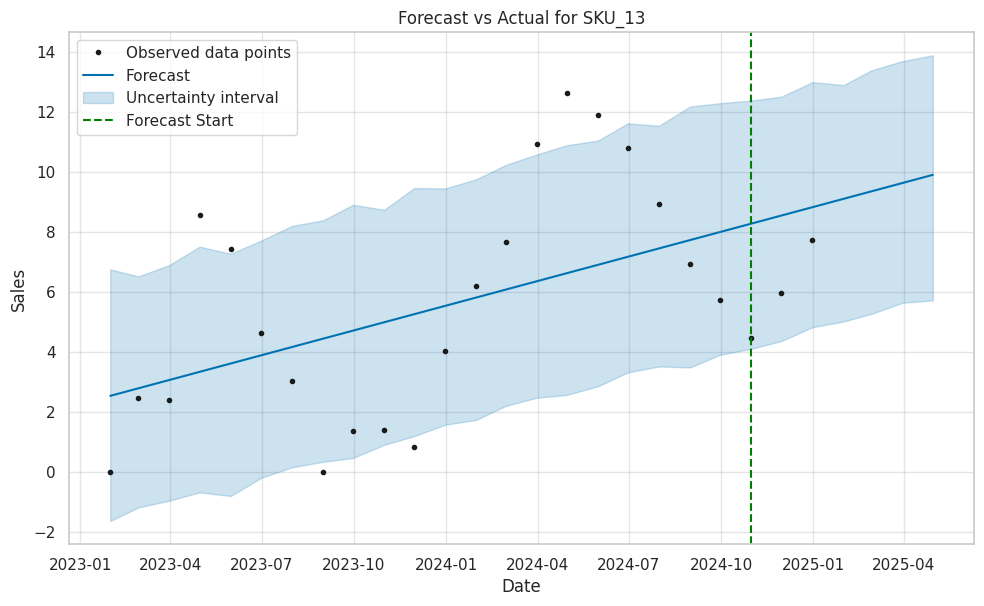

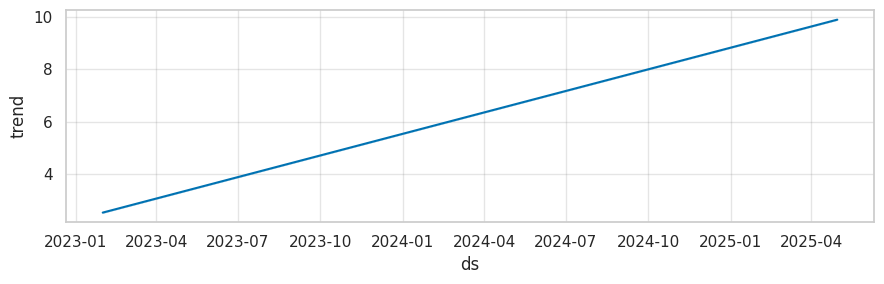

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/94m04az7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/207z8p20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36766', 'data', 'file=/tmp/tmpk62hu53j/94m04az7.json', 'init=/tmp/tmpk62hu53j/207z8p20.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_model4ka2h1z8/prophet_model-20240323084757.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1.5405949968108281


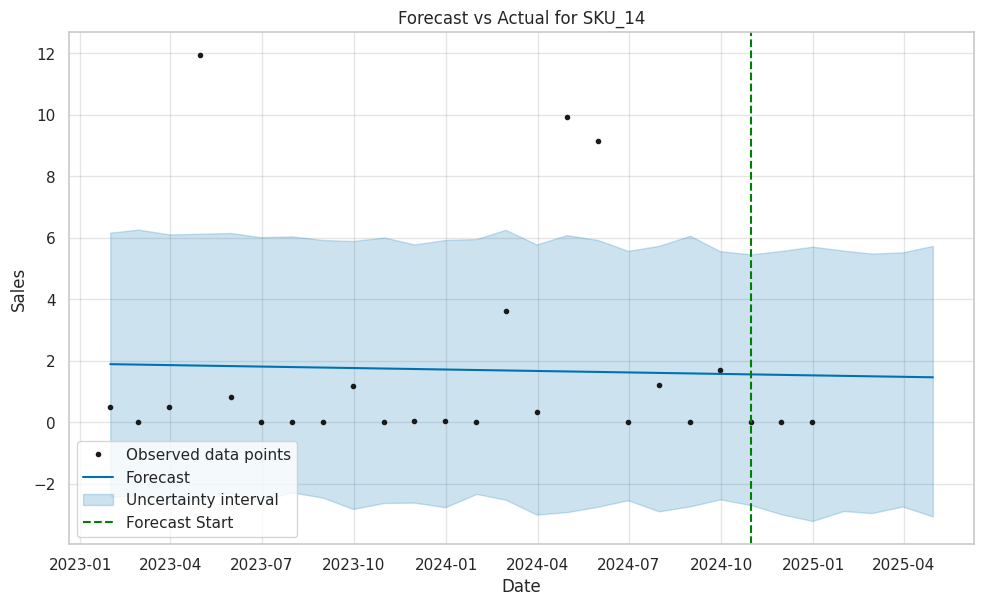

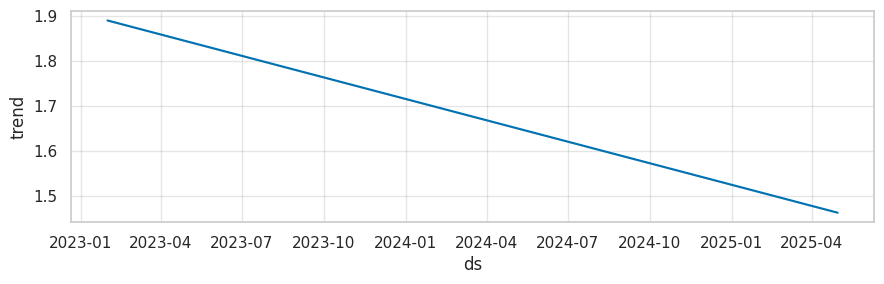

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/bunqe0ic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/w80u51e8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55237', 'data', 'file=/tmp/tmpk62hu53j/bunqe0ic.json', 'init=/tmp/tmpk62hu53j/w80u51e8.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelq4sc_ohj/prophet_model-20240323084758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1.3104030140616494


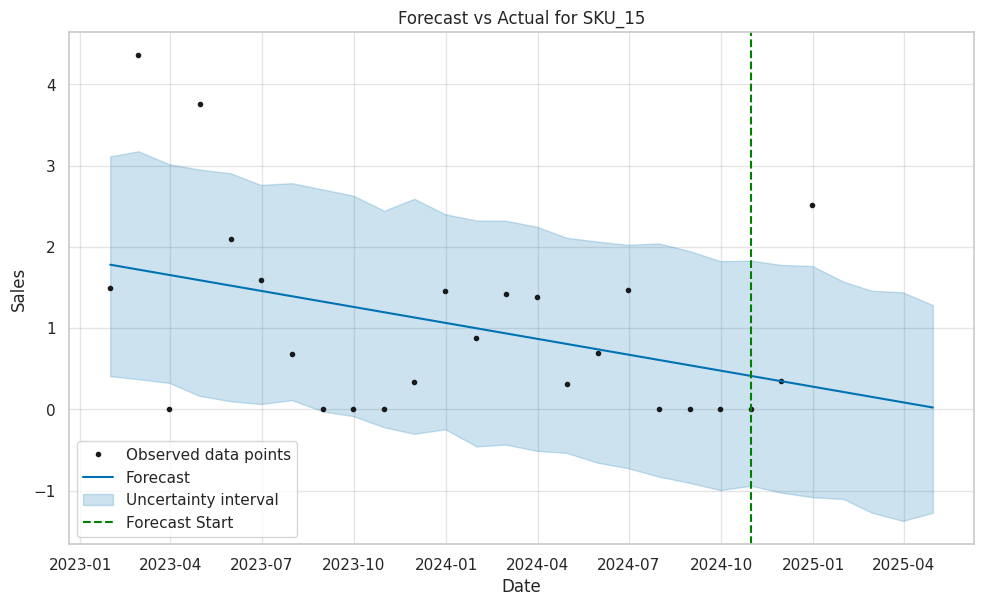

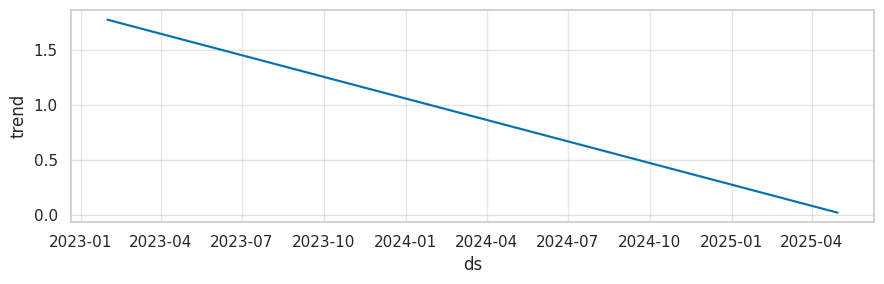

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/3acp_cbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/7u3keqro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43772', 'data', 'file=/tmp/tmpk62hu53j/3acp_cbr.json', 'init=/tmp/tmpk62hu53j/7u3keqro.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelsrhtfu8u/prophet_model-20240323084759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:47:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2.7651508136205147


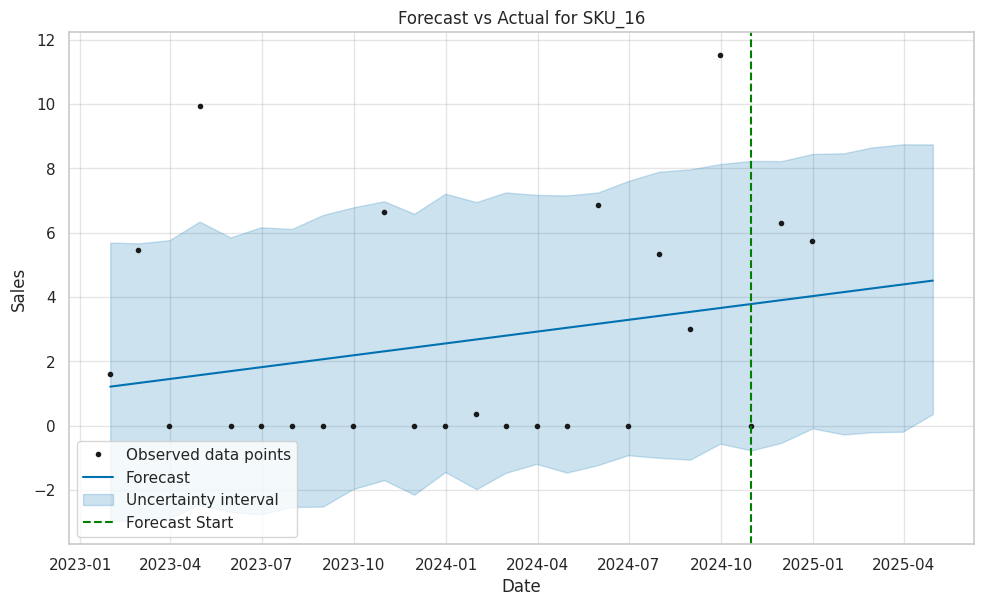

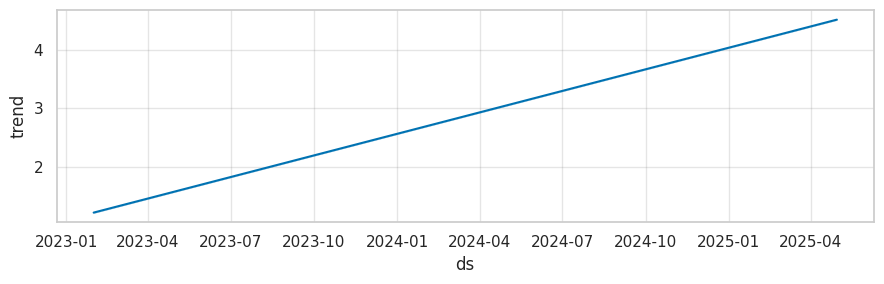

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/cosxct2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/5sm2a6bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79144', 'data', 'file=/tmp/tmpk62hu53j/cosxct2o.json', 'init=/tmp/tmpk62hu53j/5sm2a6bg.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_model589_hffm/prophet_model-20240323084800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.2601429454250048


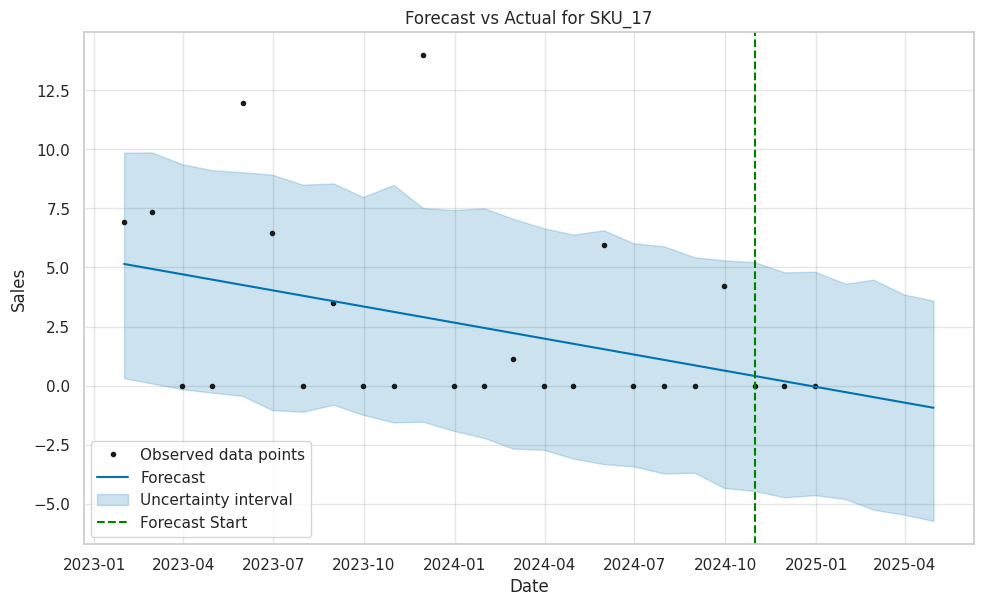

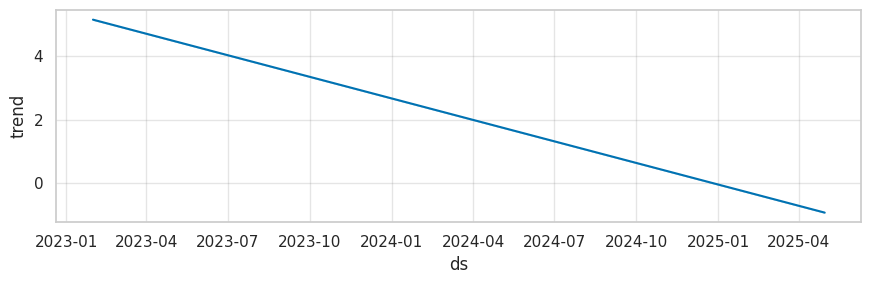

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/wsmhv3sh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/p7wktbil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13133', 'data', 'file=/tmp/tmpk62hu53j/wsmhv3sh.json', 'init=/tmp/tmpk62hu53j/p7wktbil.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelt_zzcjcx/prophet_model-20240323084801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:48:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.37752716468795894


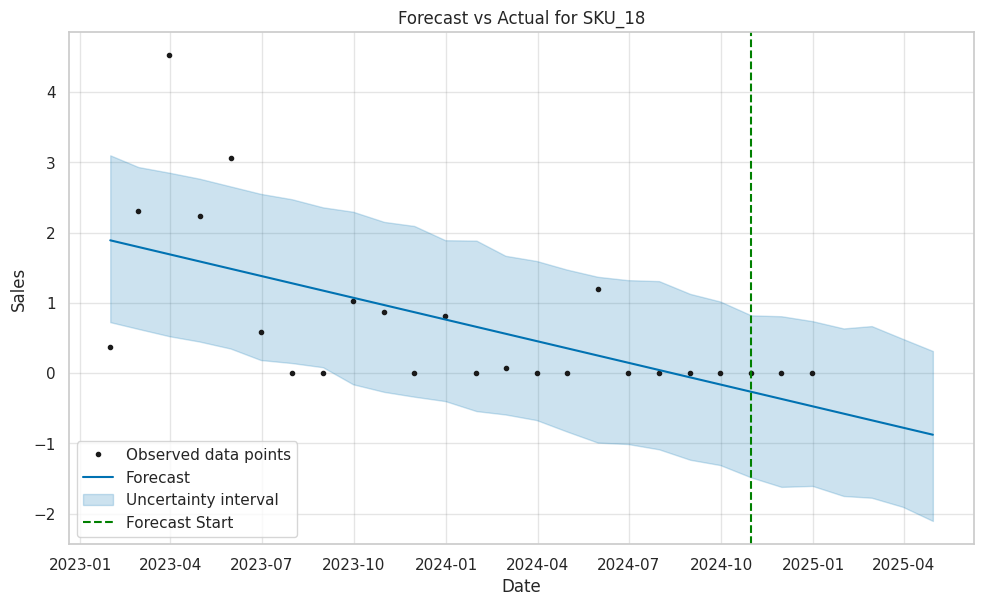

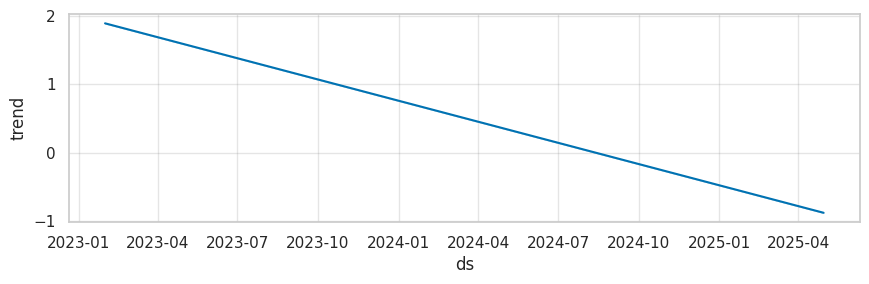

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/eoi7vs5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/zus0_14b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81964', 'data', 'file=/tmp/tmpk62hu53j/eoi7vs5c.json', 'init=/tmp/tmpk62hu53j/zus0_14b.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modeljwnewo6x/prophet_model-20240323084802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 5.35193842733513


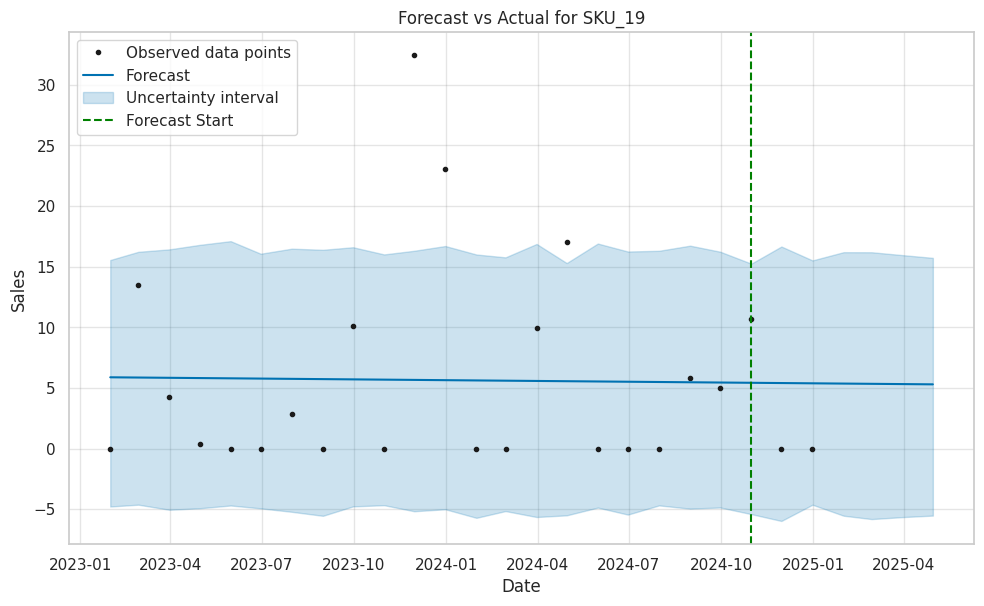

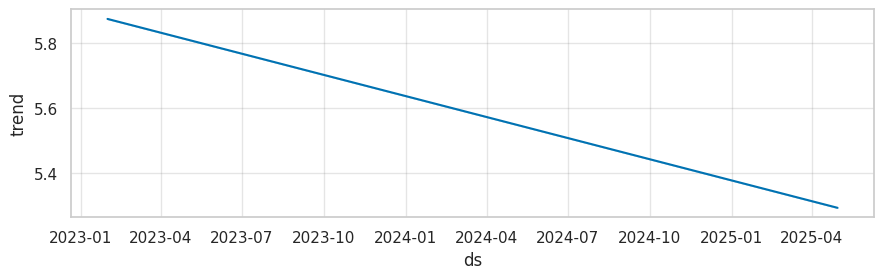

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/mlyv_62q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk62hu53j/0ljmezmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83721', 'data', 'file=/tmp/tmpk62hu53j/mlyv_62q.json', 'init=/tmp/tmpk62hu53j/0ljmezmc.json', 'output', 'file=/tmp/tmpk62hu53j/prophet_modelob9w1nko/prophet_model-20240323084804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:48:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 3.562521939252852


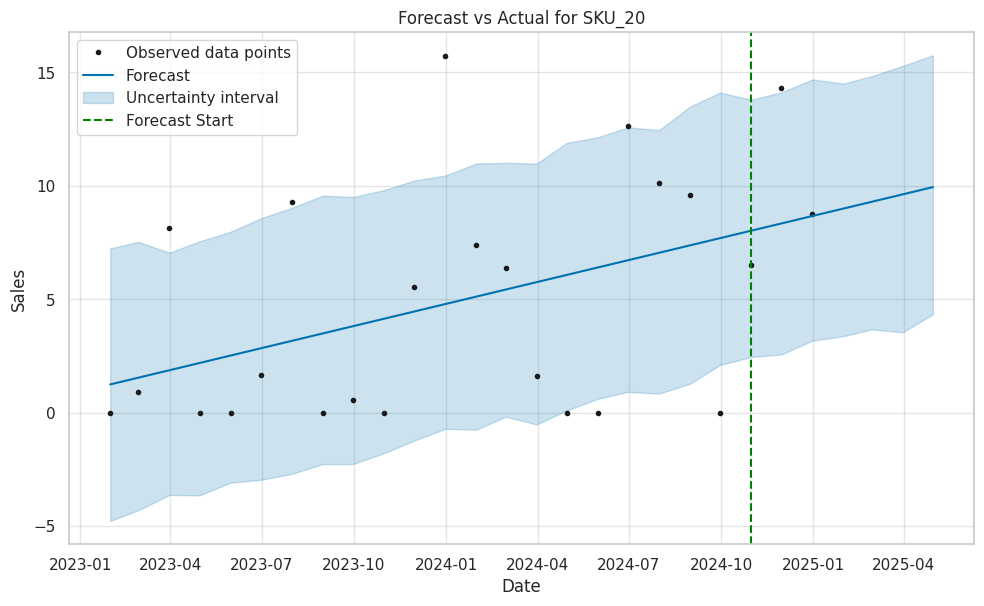

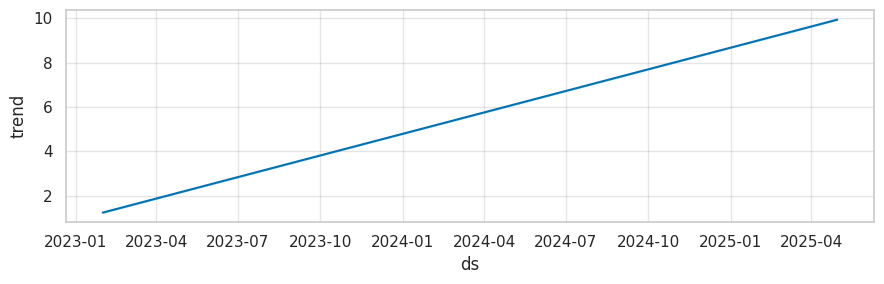

In [ ]:
# Assuming 'data_long' is your long-format DataFrame with 'Date', 'SKU', and 'Sales'
skus = data_long['SKU'].unique()

# Dictionary to store models and forecasts for each SKU
sku_models = {}
sku_forecasts = {}
sku_rmse = {}

for sku in skus:
  # Filter data for the specific SKU
  sku_data = data_long[data_long['SKU'] == sku]

  # Preparing the data for Prophet
  prophet_data = sku_data.rename(columns={'Date': 'ds', 'Sales': 'y'})

  model = Prophet()
  forecasting_with_prophet(model, prophet_data)

In [ ]:
sku_rmse_vanilla = sku_rmse.copy()
print(sku_rmse_vanilla)

{'SKU_1': 4.519157316970755, 'SKU_2': 0.7809693603771967, 'SKU_3': 0.5169729079381795, 'SKU_4': 6.832968875201059, 'SKU_5': 0.9235744435671637, 'SKU_6': 0.12352967366989624, 'SKU_7': 12.63728439019826, 'SKU_8': 2.177254304764581, 'SKU_9': 5.7902275537086005, 'SKU_10': 6.240517586748782, 'SKU_11': 9.356561989889371, 'SKU_12': 0.6628476741237819, 'SKU_13': 2.74277380715229, 'SKU_14': 1.5405949968108281, 'SKU_15': 1.3104030140616494, 'SKU_16': 2.7651508136205147, 'SKU_17': 0.2601429454250048, 'SKU_18': 0.37752716468795894, 'SKU_19': 5.35193842733513, 'SKU_20': 3.562521939252852}


**Tuned Models**

In [ ]:
# Assuming 'data_long' is your long-format DataFrame with 'Date', 'SKU', and 'Sales'
skus = data_long['SKU'].unique()

# Dictionary to store models and forecasts for each SKU
sku_models = {}
sku_forecasts = {}
sku_rmse = {}

for sku in skus:
  # Filter data for the specific SKU
  sku_data = data_long[data_long['SKU'] == sku]

  # Preparing the data for Prophet
  prophet_data = sku_data.rename(columns={'Date': 'ds', 'Sales': 'y'})

  model = model = Prophet(
    yearly_seasonality=True, daily_seasonality=False,
    changepoint_prior_scale=0.05,  # Example value, adjust based on your data
    seasonality_prior_scale=0.05   # Example value, adjust based on your data
)
  forecasting_with_prophet(model, prophet_data)

In [ ]:
sku_rmse_tuned = sku_rmse.copy()
print(sku_rmse_vanilla)
print(sku_rmse_tuned)

{'SKU_1': 4.519157316970755, 'SKU_2': 0.7809693603771967, 'SKU_3': 0.5169729079381795, 'SKU_4': 6.832968875201059, 'SKU_5': 0.9235744435671637, 'SKU_6': 0.12352967366989624, 'SKU_7': 12.63728439019826, 'SKU_8': 2.177254304764581, 'SKU_9': 5.7902275537086005, 'SKU_10': 6.240517586748782, 'SKU_11': 9.356561989889371, 'SKU_12': 0.6628476741237819, 'SKU_13': 2.74277380715229, 'SKU_14': 1.5405949968108281, 'SKU_15': 1.3104030140616494, 'SKU_16': 2.7651508136205147, 'SKU_17': 0.2601429454250048, 'SKU_18': 0.37752716468795894, 'SKU_19': 5.35193842733513, 'SKU_20': 3.562521939252852}
{'SKU_1': 3.714584822147116, 'SKU_2': 1.968336129231905, 'SKU_3': 0.7996020876582709, 'SKU_4': 5.446263567553649, 'SKU_5': 0.8614450733549905, 'SKU_6': 0.17064683995072172, 'SKU_7': 4.924098095830118, 'SKU_8': 2.1096211080826865, 'SKU_9': 4.275182003299701, 'SKU_10': 5.475490319759317, 'SKU_11': 8.014807811761399, 'SKU_12': 0.6086181436613781, 'SKU_13': 1.066943717932203, 'SKU_14': 0.9690276607661295, 'SKU_15': 0.

In [ ]:
sku_rmse_diff = {x: sku_rmse_vanilla[x] - sku_rmse_tuned[x] for x in sku_rmse_vanilla if x in sku_rmse_tuned}.copy()
print(sku_rmse_diff)

{'SKU_1': 2.941124767927305, 'SKU_2': 0.3247535287867952, 'SKU_3': 0.3210049618708595, 'SKU_4': 5.862287309599203, 'SKU_5': 0.3940064911300968, 'SKU_6': 0.03366630429922199, 'SKU_7': 12.456334063863265, 'SKU_8': 1.8820131909396811, 'SKU_9': 4.658585639133586, 'SKU_10': 6.001754887626589, 'SKU_11': 9.356229448711344, 'SKU_12': 0.6485885897330462, 'SKU_13': 2.7427334792206577, 'SKU_14': 1.379021526807358, 'SKU_15': 0.9304165641029121, 'SKU_16': 1.3515492059496386, 'SKU_17': 0.1335838141102437, 'SKU_18': -0.005748090615515344, 'SKU_19': 1.2915003189134984, 'SKU_20': 3.0772259395251935}
